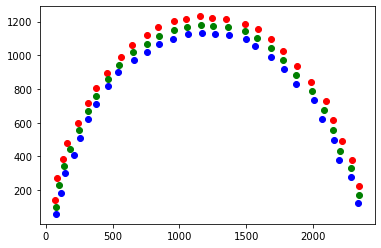

In [18]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import math as ma
# import sympy as sp

i = 0
x_top = []
y_top = []
x_bottom = []
y_bottom = []
x_mean = []
y_mean = []
x_2 = []
x_unit = []


# cap = cv2.VideoCapture('frames/noisy/cv2-red-channel_noisy_0.png')
cap = cv2.VideoCapture('ball_video1.mp4')
# path = 'home/divyansh/vid_img'
while(cap.isOpened()):
    stop_top = False
    stop_bottom = False
    ret, frame = cap.read()
    if ret == False:
        break
    red_channel = frame[:,:,2]
    cons = 255
    print(np.shape(red_channel))
    red_channel = cons - red_channel

    #result = np.max(red_channel, axis=1)
    #selecting the threshold
    result = (np.where((red_channel>40) & (red_channel<42)))
    y_top.append(1676 - result[0][0])
    x_top.append(result[1][0])
    y_bottom.append(1676 - result[0][-1])
    x_bottom.append(result[1][-1])
    
            
            
        
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break


[x_mean.append((g + h) / 2) for g, h in zip(x_top, x_bottom)]
[y_mean.append((g + h) / 2) for g, h in zip(y_top, y_bottom)]



plt.scatter(x_top, y_top, c='r')
plt.scatter(x_bottom, y_bottom, c='b')
plt.scatter(x_mean, y_mean, c='g')
plt.show()
# print(x_top, x_bottom, y_top, y_bottom)


next part

In [19]:
[x_2.append(i**2) for i in x_mean]
[x_unit.append(1) for i in x_mean]

x_2 = np.matrix(x_2)
print('this is x square', x_2)
x_2 = x_2.transpose()
x_1 = np.matrix(x_mean)
x_1 = x_1.transpose()
x_unit = np.matrix(x_unit)
x_unit = x_unit.transpose()

print('this is x_unit', x_unit)



this is x square [[5.32900000e+03 9.50625000e+03 1.79560000e+04 3.40402500e+04
  6.32522500e+04 9.89102500e+04 1.42506250e+05 2.14369000e+05
  3.04152250e+05 4.28370250e+05 5.73806250e+05 7.15716000e+05
  9.17764000e+05 1.11936400e+06 1.34792100e+06 1.57377025e+06
  1.85232100e+06 2.22755625e+06 2.48850625e+06 2.84765625e+06
  3.16128400e+06 3.51187600e+06 3.98601225e+06 4.33680625e+06
  4.62895225e+06 4.85982025e+06 5.23265625e+06 5.48496400e+06]]
this is x_unit [[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]]


In [25]:
A = np.hstack((x_2, x_1, x_unit))
A = np.matrix(A)
A_t = A.transpose()

Y = np.matrix(y_mean)
Y = Y.transpose()

A_inv = A_t*A
A_inv = np.linalg.inv(A_inv)

X = (A_inv)*A_t*Y
a = X[0].round(10)
b = X[1].round(10)
c = X[2].round(10)
print(a[0,0], b, c)

-0.0007714512 [[1.85843762]] [[103.56264919]]


In [26]:
x_gen = range(2400)
x_gen_m = np.matrix(x_gen)
x_gen_m = x_gen_m.transpose()
print(np.shape(x_gen_m))

(2400, 1)


In [27]:
x_gen_sq = []
[x_gen_sq.append(i**2) for i in x_gen]
x_gen_sq = np.matrix(x_gen_sq)
x_gen_sq = x_gen_sq.transpose()

print(np.shape(x_gen_sq))

(2400, 1)


In [28]:
y_gen = np.matrix(np.shape(x_gen_sq))
# x_gen_sq = np.array(x_gen_sq)
y_gen = a[0,0]*x_gen_sq + b[0,0]*x_gen_m + c[0,0]
print(y_gen[1000,0])

1190.5490660925002


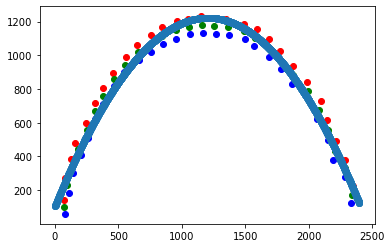

In [30]:
x_plot = x_gen_m.transpose()
x_plot = np.array(x_plot)
x_plot = x_plot.flatten()
x_l = x_plot.tolist()
# print(x_l)
y_plot = y_gen.transpose()
y_plot = np.array(y_plot)
y_plot = y_plot.flatten()
y_l = y_plot.tolist()
# print(y_l)
plt.scatter(x_top, y_top, c='r')
plt.scatter(x_bottom, y_bottom, c='b')
plt.scatter(x_mean, y_mean, c='g')
plt.scatter(x_l, y_l)
plt.show()